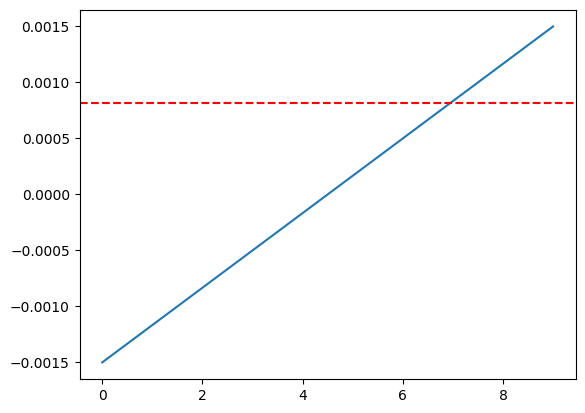

In [2]:
import numpy as np
x = np.arange(10)
y = np.linspace(-0.0015 , 0.0015 , 10)

#plot the data
import matplotlib.pyplot as plt
plt.plot(x, y)  
# plot y = 0.02
plt.axhline(y=0.00082, color='r', linestyle='--')
plt.show()

In [3]:
y

array([-0.0015    , -0.00116667, -0.00083333, -0.0005    , -0.00016667,
        0.00016667,  0.0005    ,  0.00083333,  0.00116667,  0.0015    ])

In [4]:
# 5 middle values
y_m = y[2:8]
# average of y_m{i}, y_m{i+1}
(y_m[1:] + y_m[:-1]) / 2

array([-6.66666667e-04, -3.33333333e-04, -1.08420217e-19,  3.33333333e-04,
        6.66666667e-04])

In [10]:
numbers = [ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]
[round(num, 2) for num in numbers]

[0.01, 0.02, 0.05, 0.1, 0.22, 0.46, 1.0, 2.15, 4.64, 10.0]

In [19]:

np.log(np.mean(np.exp([0.02 , 0.2])))

0.11404454428083668

In [11]:
# add parent directory to path
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.plot_utils import extract_rewards_from_run_dir, eval_random_agent
import pandas as pd
result_dirs = {
        "CARLMountainCarContinuous"  : ["results/hydra/multirun/2024-02-09/18-52-53","power", [-0.0015 , 0.0015    ], 999],
        #"CARLCartPoleContinuous" : ["results/hydra/multirun/2024-02-08/13-15-57","tau", [0.02      , 0.02583099, 0.03336201, 0.04308869, 0.05565119, 0.07187627, 0.09283178, 0.11989685, 0.15485274, 0.2       ], 200],

}
                                         
# measure performance of a random agent

random_performance_df = pd.DataFrame(columns=["Environment", "context_value", "reward"])
for env_name, (dir, context_name, context_values, max_steps) in result_dirs.items():
    for context_value in context_values:
        random_performance = eval_random_agent(env_name, context_name, context_value, max_steps)
        random_performance_df = random_performance_df._append({"Environment": env_name, "context_value": context_value, "reward": random_performance}, ignore_index=True)
        print(f"Random performance for {env_name} with context value {context_value} is {random_performance}")


env_name :  CARLMountainCarContinuous


/tmp/ipykernel_749348/408149157.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  random_performance_df = random_performance_df._append({"Environment": env_name, "context_value": context_value, "reward": random_performance}, ignore_index=True)


Random performance for CARLMountainCarContinuous with context value -0.0015 is -33.26747636726193
env_name :  CARLMountainCarContinuous
Random performance for CARLMountainCarContinuous with context value 0.0015 is -33.34316056069197


In [17]:
print(random_performance_df)

              Environment  context_value  reward
0  CARLCartPoleContinuous       0.020000   28.40
1  CARLCartPoleContinuous       0.025831   19.90
2  CARLCartPoleContinuous       0.033362   17.22
3  CARLCartPoleContinuous       0.043089   12.02
4  CARLCartPoleContinuous       0.055651    9.32
5  CARLCartPoleContinuous       0.071876    6.36
6  CARLCartPoleContinuous       0.092832    5.38
7  CARLCartPoleContinuous       0.119897    3.60
8  CARLCartPoleContinuous       0.154853    2.96
9  CARLCartPoleContinuous       0.200000    2.36
